In [1]:
#Question 1
from sklearn.datasets import load_wine
import numpy as np

train_samples = np.genfromtxt('zip.train/zip.train', usecols= np.arange(1,256))
train_labels = np.genfromtxt('zip.train/zip.train', usecols= 0)
test_samples = np.genfromtxt('zip.test/zip.test', usecols= np.arange(1,256))
test_labels = np.genfromtxt('zip.test/zip.test', usecols= 0)

Usps_samples = np.concatenate([train_samples,test_samples])
Usps_labels = np.concatenate([train_labels,test_labels])

#print(Usps_labels)
#print(datas.shape)

In [2]:
#Question 2
from sklearn.model_selection import train_test_split


#Wine
wine = load_wine()
X_train_Wine ,X_test_Wine, y_train_Wine, y_test_Wine = train_test_split(wine.data, wine.target, random_state=2404)

#print(X_train_Wine.shape)
#print(y_test_Wine,y_train_Wine.shape)

#USPS
X_train_usps, X_test_usps, y_train_usps, y_test_usps = train_test_split(Usps_samples, Usps_labels)




In [3]:
#Question 3

from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
svm = SVC() #initalize support vector classifier


#performing 5-fold cross-vlaidation on wine dataset.
scoresWine = cross_val_score(svm, X_train_Wine,y_train_Wine,cv=5)
scoreWine = np.mean(scoresWine)


#performing 5-fold cross-vlaidation on wine dataset.
scoresUsps = cross_val_score(svm, X_train_usps, y_train_usps,cv=5)
scoresUsp = np.mean(scoresUsps)


#print accuracy score for each dataset.
#print("Accuaracy  wine ",scoresWine)
#print("Accuracy usps ",scoresUsps) 

#scoreUsps = cross_val_score(svmUsps, X_)
print("mean generalization Accuracy Wine ",scoreWine)
print("mean generalization Accuracy USPS ",scoresUsp)




mean generalization Accuracy Wine  0.6618233618233618
mean generalization Accuracy USPS  0.9720354000503952


In [4]:
#question 4
svm = SVC()
svm.fit(X_train_Wine,y_train_Wine)
print("error rate wine dataset ",1 - svm.score(X_test_Wine, y_test_Wine))
print("Accuaracy  wine ",svm.score(X_test_Wine, y_test_Wine))

svm.fit(X_train_usps,y_train_usps)
print("error rate usps ",1 - svm.score(X_test_usps, y_test_usps))
print("Accuaracy  usps ",svm.score(X_test_usps, y_test_usps))

#svm.predict_proba


#scoresUspsTest =  cross_val_score(svm, X_test_usps, y_test_usps,cv=5)

#scoreWineTest = np.mean(scoresWineTest)
#scoreUspsTest = np.mean(scoresUsps)

#print("Accuracy wine test ",scoresWineTest)
#print("Accuracy usps test ",scoresUspsTest)

#print("mean generalization Accuracy Wine ",scoreWineTest)
#print("mean generalization Accuracy USPS ",scoreUspsTest)


#print("erros rate wine ",1- scoresWineTest)
#print("error rate usps ",1 - scoresUspsTest)






error rate wine dataset  0.33333333333333337
Accuaracy  wine  0.6666666666666666
error rate usps  0.02881720430107526
Accuaracy  usps  0.9711827956989247


Question 4


Between the two methods, cross-validation and SVM, I noticed that the accuracy was slightly higher when using SVM. Moreover, when comparing the Wine dataset and the USPS dataset, the accuracy values were noticeably higher for the USPS dataset. My conclusion is that the accuracy is higher for the USPS dataset because it is significantly larger than the Wine dataset. Therefore, the model was trained more effectively.



In [5]:
#I have implemented question 5 and 6 in the same cell.

#question 5
#question 6

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer


def normalation(X_train, X_test, y_train, y_test):
#define scaler
    scaler ={
        "StandardScaler": StandardScaler(),
        "MinMaxScaler": MinMaxScaler(),
        "RobustScaler":RobustScaler(),
        "Normalizer": Normalizer()
    }

    param_grid = {'svc__C':[0.01,0.1,1,10,100], 'svc__gamma':[0.001,0.01,0.1,1]}


    test_error_rate = 10
    #loop through each scaler, create a piperline. 
    for scaler_name, scaler in scaler.items():
        pipe = Pipeline([("scaler", scaler),("svc",SVC())])

        grid = GridSearchCV(pipe, param_grid=param_grid,cv=5,n_jobs=-1)
        #grid.fit(X_train_Wine, y_train_Wine)
        grid.fit(X_train,y_train)
        print("best cross-validation accuracy: ",grid.best_score_)
        #v = grid.best_params_
        print("best parameters: ", grid.best_params_)
        #yPredict = grid.best_estimator_.predict(X_test_Wine)
        yPredict = grid.best_estimator_.predict(X_test)

        #print("predicted label ",yPredict)
        #tmp = 1 - (yPredict == y_test_Wine).mean()
        tmp = 1 - (yPredict == y_test).mean()
        print("Error rate ",tmp)
        print(scaler_name)
        if test_error_rate > tmp:
            test_error_rate = tmp
            name = scaler_name
            v = grid.best_params_
        
    
    print("The best Error rate:",test_error_rate)
    print("The best scaler name: ",name)
    print("The best C and gamma: ",v)
    return name,v 
    #print("BEST PARAM",v)
    #print("The best Error rate:",test_error_rate)
    #print("the best estimator: ", name)










In [6]:
#this cell as parameter for wise dataset
normalation(X_train_Wine,X_test_Wine,y_train_Wine,y_test_Wine)

best cross-validation accuracy:  0.9851851851851852
best parameters:  {'svc__C': 10, 'svc__gamma': 0.01}
Error rate  0.0444444444444444
StandardScaler
best cross-validation accuracy:  0.9923076923076923
best parameters:  {'svc__C': 10, 'svc__gamma': 0.1}
Error rate  0.022222222222222254
MinMaxScaler
best cross-validation accuracy:  0.9851851851851852
best parameters:  {'svc__C': 10, 'svc__gamma': 0.1}
Error rate  0.0444444444444444
RobustScaler
best cross-validation accuracy:  0.713960113960114
best parameters:  {'svc__C': 100, 'svc__gamma': 1}
Error rate  0.2666666666666667
Normalizer
The best Error rate: 0.022222222222222254
The best scaler name:  MinMaxScaler
The best C and gamma:  {'svc__C': 10, 'svc__gamma': 0.1}


('MinMaxScaler', {'svc__C': 10, 'svc__gamma': 0.1})

In [7]:
#this cell as paramter for usps
normalation(X_train_usps,X_test_usps,y_train_usps,y_test_usps)

best cross-validation accuracy:  0.9670160390408459
best parameters:  {'svc__C': 100, 'svc__gamma': 0.001}
Error rate  0.03010752688172047
StandardScaler
best cross-validation accuracy:  0.9711746707599904
best parameters:  {'svc__C': 10, 'svc__gamma': 0.01}
Error rate  0.026236559139784954
MinMaxScaler
best cross-validation accuracy:  0.8828398204285648
best parameters:  {'svc__C': 100, 'svc__gamma': 0.001}
Error rate  0.09720430107526878
RobustScaler
best cross-validation accuracy:  0.9744736016620129
best parameters:  {'svc__C': 10, 'svc__gamma': 1}
Error rate  0.02408602150537631
Normalizer
The best Error rate: 0.02408602150537631
The best scaler name:  Normalizer
The best C and gamma:  {'svc__C': 10, 'svc__gamma': 1}


('Normalizer', {'svc__C': 10, 'svc__gamma': 1})

question 5
 
After fitting the model with the training set, I tested it using all four scalers. For the Wine dataset, the highest accuracy was achieved with the MinMaxScaler(), while for the USPS dataset, the best performance was obtained with the Normalizer(). 

wine dataset:
The best Error rate: 0.022222222222222254
The best scaler name:  MinMaxScaler
The best C and gamma:  {'svc__C': 10, 'svc__gamma': 0.1}

usps dataset:
The best Error rate: 0.024516129032258083
The best scaler name:  Normalizer
The best C and gamma:  {'svc__C': 10, 'svc__gamma': 1}

question 6

WINE DATASET:
Error rate  0.0444444444444444
StandardScaler
Error rate  0.022222222222222254
MinMaxScaler
Error rate  0.0444444444444444
RobustScaler
Error rate  0.2666666666666667
Normalizer

The best Error rate for WINE dataset: 0.022222222222222254
the best estimator for WINE dataset:  MinMaxScaler

USPS DATASET:
Error rate  0.030967741935483906
StandardScaler
Error rate  0.027956989247311825
MinMaxScaler
Error rate  0.08430107526881725
RobustScaler
Error rate  0.02408602150537631
Normalizer

Test best Error rate for USPS dataset: 0.02408602150537631
the best estimator for USPS DATASET:  Normalizer

the result gained with the wine set  and usps dataset in question 5 using with the best score has been confirmed calculating the error rate. Indeed the rate error is lowest in MinMaxScaler() and for usps Normalizer().
 

In [8]:
#question 7 
#this is my attemp to implement question 7. I nkeo that the implemantion is not right but i tried anyway.
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.svm import SVC

def kFolds(X_train, X_test, y_train, y_test):

    

    
#define scaler
    scaler ={
        "StandardScaler": StandardScaler(),
        "MinMaxScaler": MinMaxScaler(),
        "RobustScaler":RobustScaler(),
        "Normalizer": Normalizer()
    }

    param_grid = {'svc__C':[0.01,0.1,1,10,100], 'svc__gamma':[0.001,0.01,0.1,1]}

    #test_error_rate = 10
    #loop through each scaler, create a piperline. 
    for scaler_name, scaler in scaler.items():
        pipe = Pipeline([("scaler", scaler),("svc",SVC())])
        #for i in range(5,11):
        grid = GridSearchCV(pipe, param_grid=param_grid,cv=5,n_jobs=2)
        #grid.fit(X_train_Wine, y_train_Wine)
        grid.fit(X_train,y_train)
        #print("best parameters: ", grid.best_params_)
        model = grid.best_estimator_
        kf = KFold(n_splits=5, shuffle=True, random_state=2404)
        p_valuesrr = []

        # Conformity computation for cross-conformal prediction
        for rest_fold_index, fold_index in kf.split(X_train):
            # Split into training and calibration sets
            X_rest_fold, X_fold = X_train[rest_fold_index], X_train[fold_index]
            y_rest, y_fold = y_train[rest_fold_index], y_train[fold_index]


            # Fit model on training fold
            model.fit(X_rest_fold, y_rest)
    
            # Compute conformity scores  for each fold using decision_function
            conformity_scores = model.decision_function(X_fold)

            #retrieve max volues of of calibration set.
            calib_pred = np.max(conformity_scores, axis = 1)
            #print("calibration ",conformity_scores)
            
            # Evaluate on test set
            test_scores = model.decision_function(X_test)

            #retrieve max volues of of calibration set.
            test_pred = np.max(test_scores, axis=1)

    
            # Compute p-values for all test samples
        for test_score in test_pred:
            rank = (np.sum(calib_pred <= test_score) - 1)
            p_value = ((rank)+1) / (len(calib_pred) + 1)
            p_valuesrr.append(p_value)


        p_values_ = np.array(p_valuesrr).reshape(-1, len(X_test))
        #print("p_values ",p_values_FUNCTION)

        # Compute the calibration curve
        eps = np.linspace(0, 1, 100)
        error_rate = []
        
        for e in eps:
            #print(error_rate)
            error_rate.append(np.mean(p_values_ <= e))

        # Plot calibration curve
        plt.plot(eps, error_rate, label=f'{scaler_name}')
        plt.plot(eps, error_rate, label='Calibration Curve')
        plt.plot(eps, eps, '--', label='Ideal')
        plt.xlabel('Significance Level (ε)')
        plt.ylabel('Error Rate')
        plt.title('Calibration Curve')
        plt.legend()
        plt.grid()
        plt.show()

        average_false_p_valueN = calculate_average_false_p_value(model, X_test, y_test, p_values_)
        print(f"Average False p-value on Test Set for : {scaler_name} {average_false_p_valueN}")



#function responsibe to calcualte the average false p-value.
def calculate_average_false_p_value(model, X_test, y_test, p_values):
    #print(model)
    predictions = model.predict(X_test)
    #print(predictions)
    incorrect_predictions = y_test != predictions
    
    p_values = np.array(p_values)
    if len(p_values.shape) == 2:
        p_values = np.mean(p_values, axis=0)
    
    false_p_values = p_values[incorrect_predictions]
    if false_p_values.size > 0:
        average_false_p_value = np.mean(false_p_values)
    else:
         average_false_p_value = 0  # or handle as appropriate

    return average_false_p_value

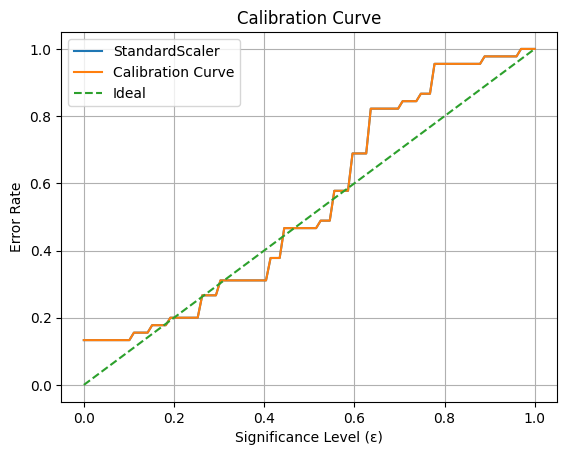

Average False p-value on Test Set for : StandardScaler 0.0


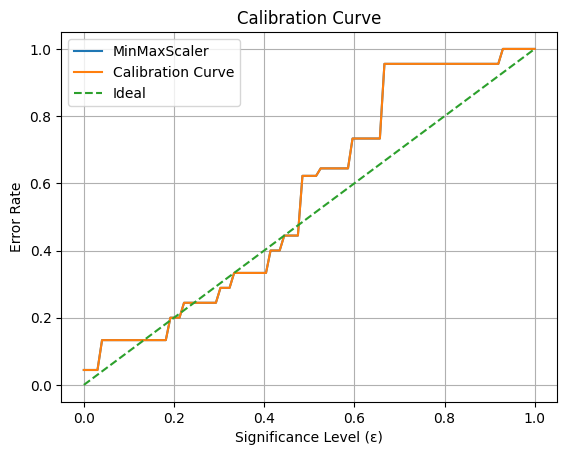

Average False p-value on Test Set for : MinMaxScaler 0.018518518518518517


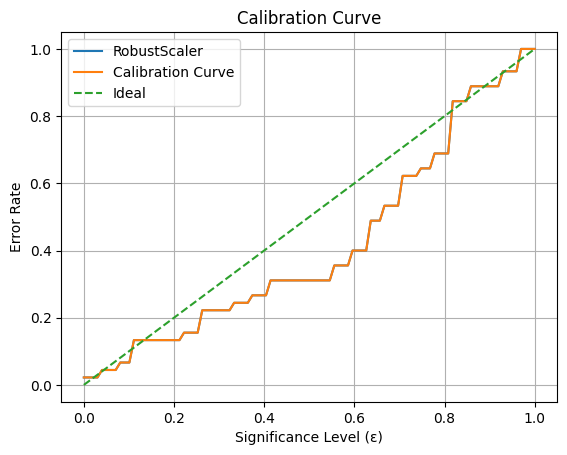

Average False p-value on Test Set for : RobustScaler 0.05555555555555555


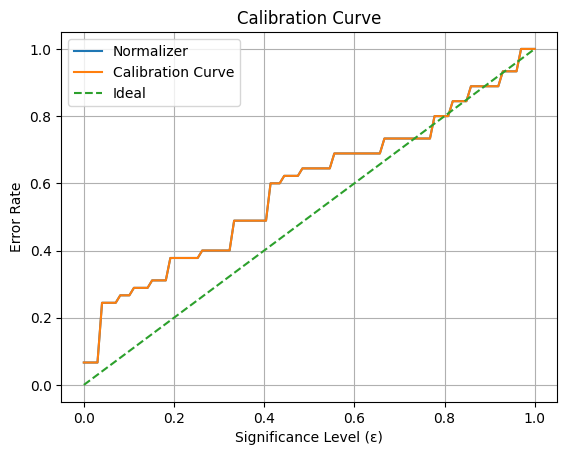

Average False p-value on Test Set for : Normalizer 0.21296296296296297


In [9]:
#i use given scaler and parameter grid as i found them in task 5
kFolds(X_train_Wine,X_test_Wine,y_train_Wine,y_test_Wine)

Extra mark:

has extra work I analized the graph with all 4 different scale and different different folder. all the evalutions have taken in consideration the best validation and best error rate gained in question 5.  the graphs do not follows exactly the error rate as you can observe on alverage false p-value. 

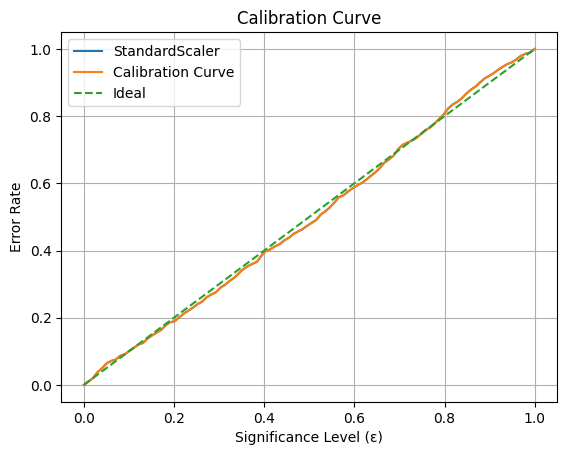

Average False p-value on Test Set for : StandardScaler 0.1800204813108039


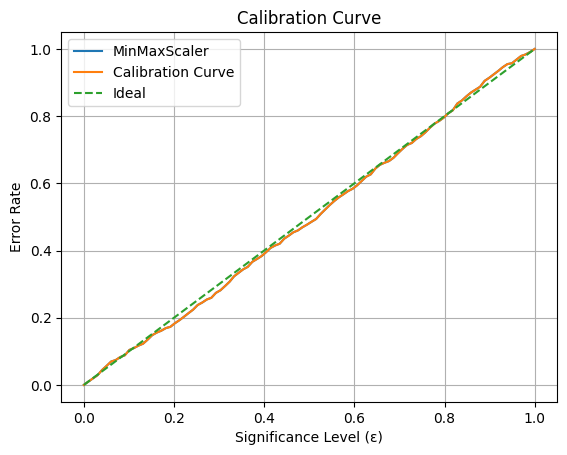

Average False p-value on Test Set for : MinMaxScaler 0.16200716845878138


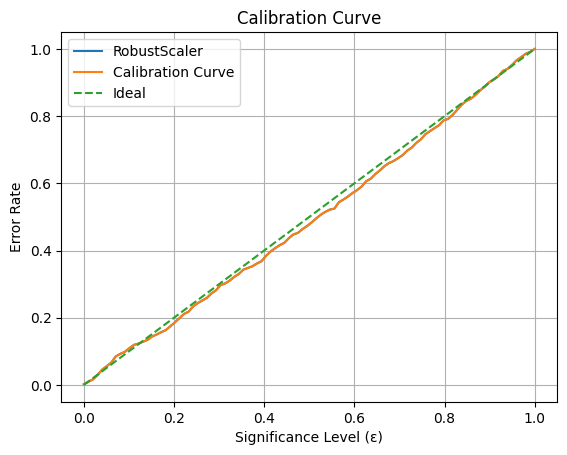

Average False p-value on Test Set for : RobustScaler 0.1501940223347848


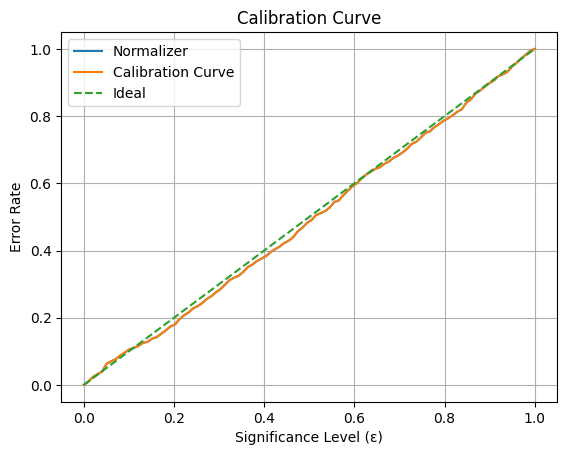

Average False p-value on Test Set for : Normalizer 0.12717497556207236


In [10]:
#i use given scaler and parameter grid as i found them in task 5
kFolds(X_train_usps,X_test_usps,y_train_usps,y_test_usps)

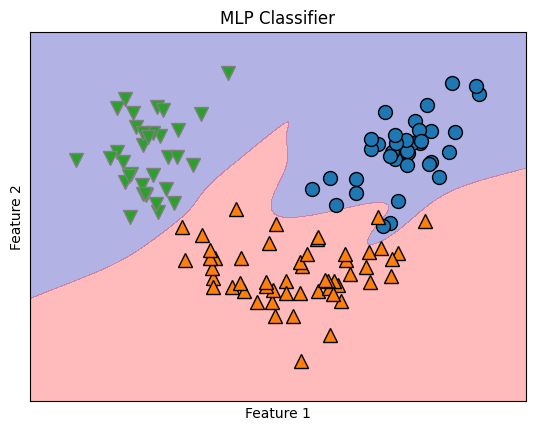

In [11]:
#question 8
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import mglearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler

# Load Wine dataset
data = load_wine()
X, y = data.data, data.target

# Standardize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2 dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=2404)

# Define the classifier and fit
mpl = MLPClassifier(solver='lbfgs', activation='tanh', random_state=2404, hidden_layer_sizes=[10])
mpl.fit(X_train, y_train)

# Plot the decision boundary
mglearn.plots.plot_2d_separator(mpl, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("MLP Classifier")
plt.show()


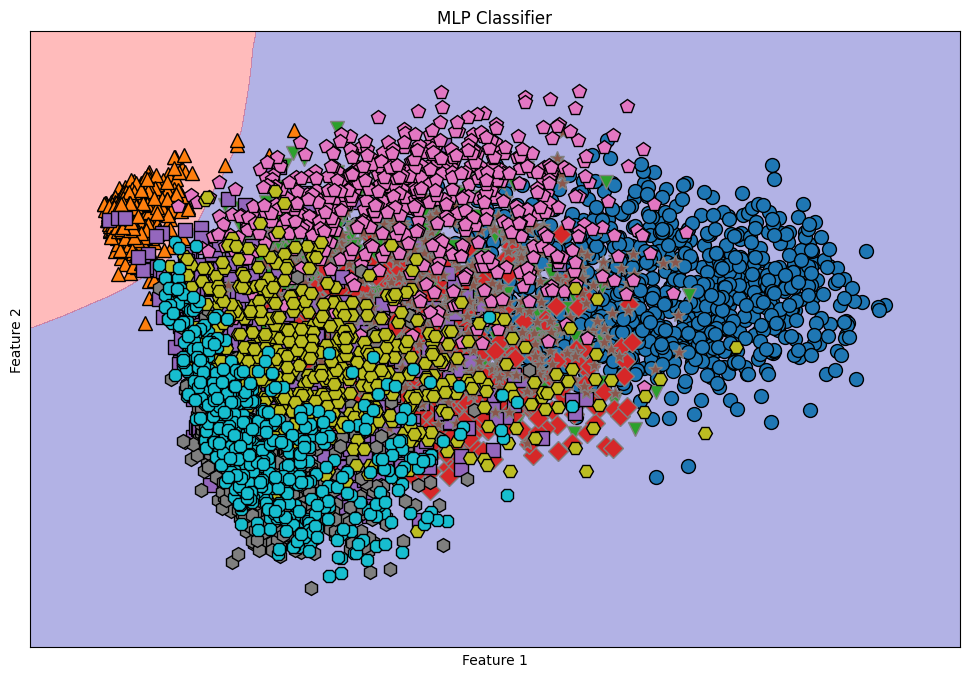

In [12]:
#question 8
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import mglearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer

# Load Wine dataset
train_samples = np.genfromtxt('zip.train/zip.train', usecols= np.arange(1,256))
train_labels = np.genfromtxt('zip.train/zip.train', usecols= 0)
test_samples = np.genfromtxt('zip.test/zip.test', usecols= np.arange(1,256))
test_labels = np.genfromtxt('zip.test/zip.test', usecols= 0)

Usps_samples = np.concatenate([train_samples,test_samples])
Usps_labels = np.concatenate([train_labels,test_labels])

# Standardize the data
scaler = Normalizer()
X_scaled = scaler.fit_transform(Usps_samples)

# Reduce to 2 dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, Usps_labels, test_size=0.3, random_state=2404)

# Define the classifier and fit
mpl = MLPClassifier(solver='adam', activation='relu', random_state=2404, hidden_layer_sizes=(50,30), max_iter=500)
mpl.fit(X_train, y_train)

# Plot the decision boundary
plt.figure(figsize=(12,8))
mglearn.plots.plot_2d_separator(mpl, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("MLP Classifier")
plt.show()


Exercise 8. using usps dataset the overalpping of the features is the consegunceies by the elevate numbers of the features of the dataset plotted in 2D dimentions.

to eliminate the woarming if had to increase the iterations.